In [135]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

In [136]:
df1 = pd.read_csv('train.csv')
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [137]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [138]:
df1 = df1.dropna(subset=['Age', 'Embarked']) # Удаляем пропущенные данные
df1 = df1.dropna(axis=1) # Удаляем столбей Cabin. Очень много пропусков
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [139]:
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit_transform(df1['Survived'])
X = df1.select_dtypes(exclude=['object']).drop('Survived', axis=1)

In [140]:
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression(max_iter=1000, random_state=36).fit(X, y)

In [141]:
from sklearn.metrics import f1_score
print (f'Accuracy: {lr1.score(X, y)}, F1-score: {f1_score(y, lr1.predict(X))}')
# Будем ориентироваться на Accuracy, как в соревновании на Kaggle

Accuracy: 0.7064606741573034, F1-score: 0.586138613861386


# Улучшаем данные

In [142]:
df2 = pd.read_csv('train.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [143]:
# Удаляем Имя, Id, Ticket. Вряд ли эти признаки как-то влияют на выживание
df2 = df2.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

Посмотрим, какие значения встречаются в данных

In [144]:
for col in df2.columns:
    print(col)
    print(df2[col].unique())
    print(10*'-')

Survived
[0 1]
----------
Pclass
[3 1 2]
----------
Sex
['male' 'female']
----------
Age
[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
----------
SibSp
[1 0 3 4 2 5 8]
----------
Parch
[0 1 2 5 3 4 6]
----------
Fare
[  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417

Посмотрим зависимоть целевой переменной от категории

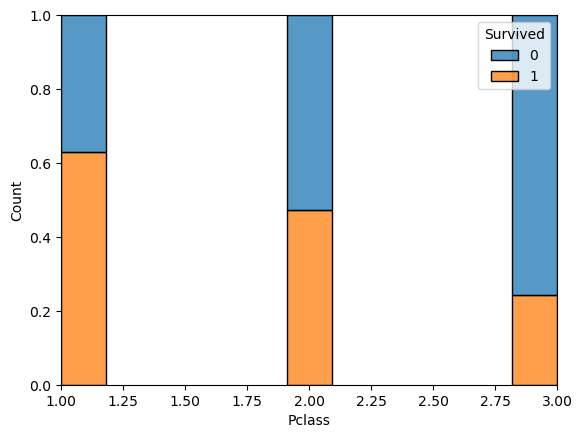

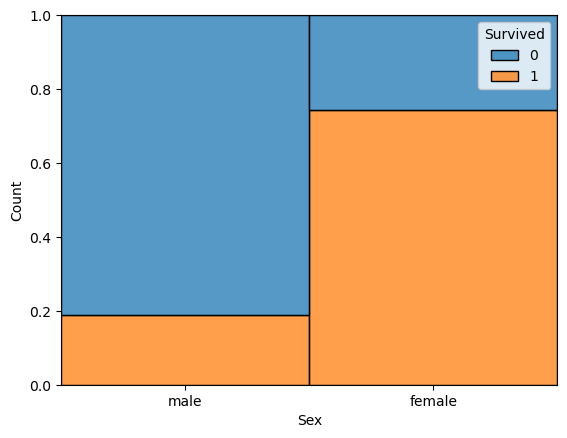

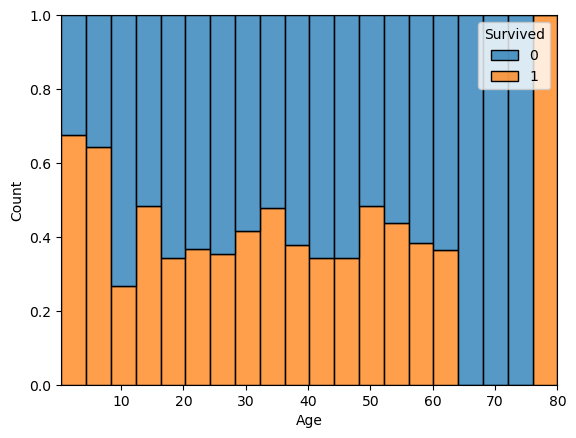

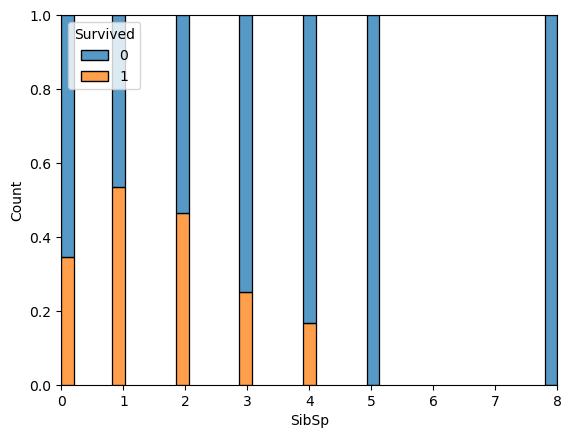

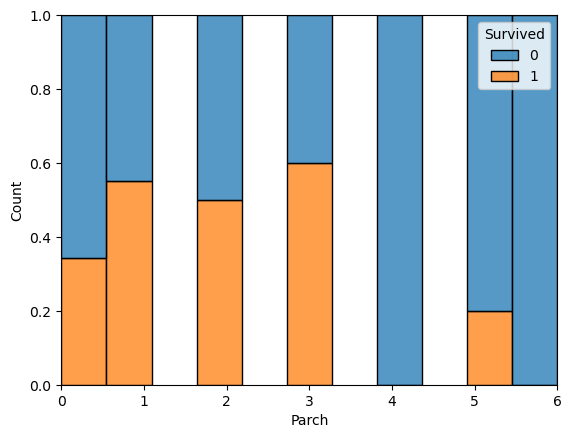

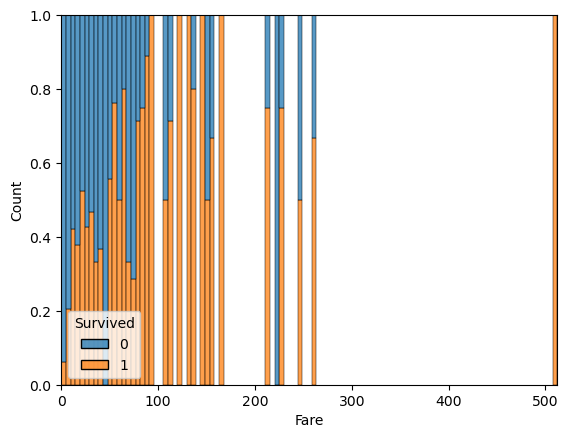

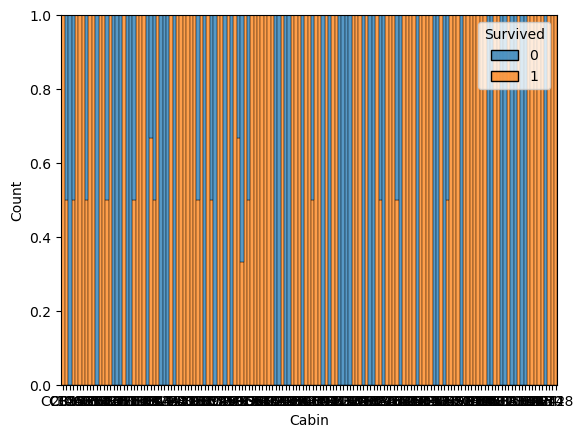

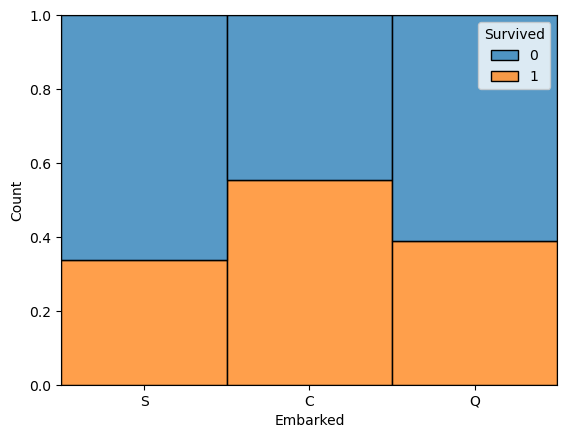

In [145]:
for col in df2.columns.drop('Survived'):
    sns.histplot(
        data=df2,
        x=col,
        hue='Survived',
        multiple='fill',
    )
    plt.show()

Можно проследить, что есть зависимость выживших от всех представленных признаков

# Работаем с пропусками


### Age

In [146]:
df2.groupby('Pclass').agg({'Age':'mean'})

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


Видно, что есть зависимость среднего возраста от класса. Заполним средний пропусками по классу

In [147]:
df2['Age'] = df2['Age'].fillna(df2.groupby('Pclass')['Age'].transform('median'))

### Embarked - заполним модой

In [148]:
df2['Embarked'] = df2['Embarked'].fillna(df2['Embarked'].mode()[0])

### Cabin
Из анализа можно сделать вывод, что в номере каюты скорее всего зашифрована палуба. Это может повлиять на выживание.

Вытащим номер каюты из имеющихся данных. Применим indicator method 

In [149]:
df2['Cabin'] = df2['Cabin'].str[0]
df2['cabin_flag'] = ~df2['Cabin'].isna().astype(int) + 2
df2['Cabin'] = df2['Cabin'].fillna('')

# Выбросы
Имеет смысл проверять только для Age и Fare

<Axes: >

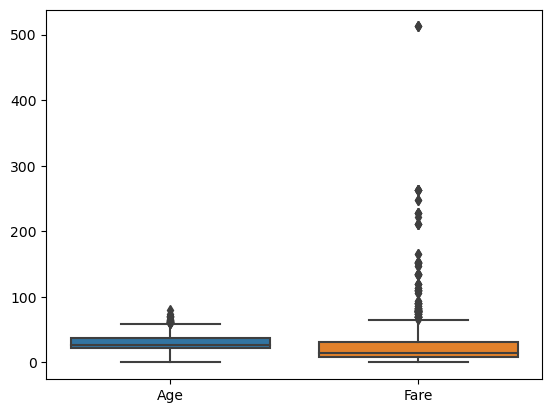

In [150]:
sns.boxplot(df2[['Age', 'Fare']])

Выбросов не много. Не будем ничего с ними делать

# Работаем с категориями

In [151]:
y2 = df2['Survived']

### Cabin
Используем LabelEncoder, что бы сохранить зависимость от расположения палубы

In [152]:
le_cabin = LabelEncoder().fit(df2['Cabin'])
le_cabin.classes_

array(['', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'], dtype=object)

In [153]:
df2['Cabin'] = le_cabin.transform(df2['Cabin'])

### Оставшиеся признаки

In [154]:
X2 = pd.get_dummies(df2, dtype=int).drop('Survived', axis=1)

# Строим модель

In [155]:
lr2 = LogisticRegression(max_iter=1000, random_state=36).fit(X2, y2)

print (f'Accuracy: {lr2.score(X2, y2)}, F1-score: {f1_score(y2, lr2.predict(X2))}')

Accuracy: 0.8148148148148148, F1-score: 0.7496206373292867


# ROC

In [157]:
from sklearn.metrics import roc_curve

pr_pr1 = lr1.predict_proba(X)[:,1]
fpr, tpr, _ = roc_curve(y, pr_pr1)

pr_pr2 = lr2.predict_proba(X2)[:,1]
fpr2, tpr2, _ = roc_curve(y2, pr_pr2)



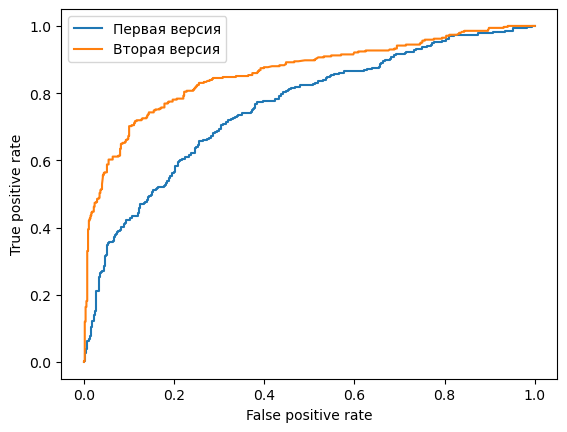

In [158]:
plt.plot(fpr, tpr, label = 'Первая версия')
plt.plot(fpr2, tpr2, label ='Вторая версия')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()

# Выводы

В результате преобразований данных удалось улучшить модель.

Показатели выросли:
- Accuracy с 0.71 до 0.81
- F1-score с 0.59 до 0.75

ROC так же подтверждает улучшение модели